In [19]:
import pandas as pd
import geopandas as gpd
import contextily as ctx
import matplotlib.pyplot as plt
import plotly.express as px

In [20]:
gs = gpd.read_file("Historical SNAP Retailer Locator Data as of 20201231edited.csv")

In [21]:
gs.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 1377 entries, 0 to 1376
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   Store_Name          1377 non-null   object  
 1   Store_Chain         1377 non-null   object  
 2   Store_Type          1377 non-null   object  
 3   Street_Number       1377 non-null   object  
 4   Street_Name         1377 non-null   object  
 5   Additional Address  1377 non-null   object  
 6   City                1377 non-null   object  
 7   State               1377 non-null   object  
 8   Zip_Code            1377 non-null   object  
 9   County              1377 non-null   object  
 10  Latitude            1377 non-null   object  
 11  Longitude           1377 non-null   object  
 12  Authorization_Date  1377 non-null   object  
 13  geometry            0 non-null      geometry
dtypes: geometry(1), object(13)
memory usage: 150.7+ KB


In [22]:
type(gs)

geopandas.geodataframe.GeoDataFrame

In [23]:
gs.head()

,Store_Name,Store_Chain,Store_Type,Street_Number,Street_Name,Additional Address,City,State,Zip_Code,County,Latitude,Longitude,Authorization_Date,geometry
0,99 Ranch Market 38,99 Ranch Market,Super Store,345,E Main St,,Alhambra,CA,91801,LOS ANGELES,34.09719,-118.1227,05/20/2015,None
1,99 RANCH MARKET 17,99 Ranch Market,Super Store,17713,Pioneer Blvd,,Artesia,CA,90701,LOS ANGELES,33.87005,-118.0824,11/14/2003,None
2,99 Ranch Market 18,99 Ranch Market,Super Store,1625,S Azusa Ave,,Hacienda Heights,CA,91745,LOS ANGELES,33.99284,-117.9318,05/01/1998,None
3,99 RANCH MARKET 7,99 Ranch Market,Super Store,1300,S Golden West Ave,,Arcadia,CA,91007,LOS ANGELES,34.12338,-118.0597,09/04/1992,None
4,99 Ranch Market 3,99 Ranch Market,Super Store,1015,S Nogales St,,Rowland Heights,CA,91748,LOS ANGELES,33.99646,-117.8884,04/13/1989,None


In [24]:
desired_columns = ['Store_Name','Store_Chain','Street_Number','Street_Name', 'Additional Address','City','Zip_Code','Latitude','Longitude']
gs[desired_columns].sample(5)

,Store_Name,Store_Chain,Street_Number,Street_Name,Additional Address,City,Zip_Code,Latitude,Longitude
464,Mother's Nutritional Center 228,Mother_Nutrition,156,E Compton Blvd,,Compton,90220,33.89593,-118.2227
593,Ralphs Fresh Fare 724,Ralphs,9040,Beverly Blvd,,West Hollywood,90048,34.07716,-118.3889
352,GELSON'S MARKET 108,Gelsons,8330,Santa Monica Blvd,,West Hollywood,90069,34.09065,-118.3716
1332,Walmart Store 2960,Walmart,4101,S CRENSHAW BLVD,,BALDWIN HILLS,90008,34.01047,-118.3352
85,ALBERTSONS 6333,Albertsons,38727,Tierra Subida Ave,,Palmdale,93551,34.58509,-118.1476


In [25]:
gs_trimmed = gs[desired_columns].copy()
gs_trimmed

,Store_Name,Store_Chain,Street_Number,Street_Name,Additional Address,City,Zip_Code,Latitude,Longitude
0,99 Ranch Market 38,99 Ranch Market,345,E Main St,,Alhambra,91801,34.09719,-118.1227
1,99 RANCH MARKET 17,99 Ranch Market,17713,Pioneer Blvd,,Artesia,90701,33.87005,-118.0824
2,99 Ranch Market 18,99 Ranch Market,1625,S Azusa Ave,,Hacienda Heights,91745,33.99284,-117.9318
3,99 RANCH MARKET 7,99 Ranch Market,1300,S Golden West Ave,,Arcadia,91007,34.12338,-118.0597
4,99 Ranch Market 3,99 Ranch Market,1015,S Nogales St,,Rowland Heights,91748,33.99646,-117.8884
...,...,...,...,...,...,...,...,...,...
1372,Whole Foods Market 10177,Whole_Foods,6350,W 3rd St,,Los Angeles,90036,34.07133,-118.3603
1373,Whole Foods Market 10536,Whole_Foods,12746,W Jefferson Blvd,,Playa Vista,90094,33.97406,-118.4257
1374,Whole Foods Market 10545,Whole_Foods,3401,W Olive Ave,,Burbank,91505,34.15423,-118.3369
1375,Whole Foods Market 10383,Whole_Foods,500,Wilshire Blvd,,Santa Monica,90401,34.01985,-118.4973


In [26]:
gs_trimmed.columns.to_list()

['Store_Name',
 'Store_Chain',
 'Street_Number',
 'Street_Name',
 'Additional Address',
 'City',
 'Zip_Code',
 'Latitude',
 'Longitude']

In [27]:
gs_trimmed.Store_Chain.unique().tolist()

['99 Ranch Market',
 'Albertsons',
 'Aldi',
 'Amazon',
 'Best_way_supermarket',
 'Big_k_mart',
 'Big_saver_food',
 'Buy_low',
 'Carniceria_Vallarta',
 'Costco_Wholesale',
 'El_Super',
 'Food_4_Less',
 'Fresh&Easy',
 'Galleria',
 'Gelsons',
 'Gigante',
 'Grocery_Outlet',
 'H_mart',
 'Haggen',
 'Hong_kong_supermarket',
 'Hows',
 'Island_Pacific',
 'Jons',
 'Kmart',
 'Mother_Nutrition',
 'Northgate',
 'Numero_uno',
 'Payless_food',
 'R_ranch',
 'Ralphs',
 'Sams_club',
 'Sav_on_drug',
 'Seafood_city',
 'Smart&final',
 'Sprouts',
 'Stater_bros',
 'Super_A_food',
 'Super_king',
 'Superior_grocers',
 'Target',
 'Top_valu',
 'Trader_joes',
 'Vallarta',
 'Valu_plus',
 'Vons',
 'Walmart',
 'Whole_Foods']

In [28]:
number_stores = gs_trimmed.Store_Chain.value_counts().reset_index()
number_stores.to_csv('number_stores.csv')

In [59]:
number_stores

,index,Store_Chain
0,Ralphs,145
1,Vons,111
2,Smart&final,99
3,Albertsons,97
4,Target,76
5,Mother_Nutrition,65
6,Trader_joes,60
7,Food_4_Less,54
8,Walmart,49
9,Fresh&Easy,47


In [29]:
number_stores_1 = pd.read_csv('number_stores.csv',index_col=0)
number_stores_1.head()

,index,Store_Chain
0,Ralphs,145
1,Vons,111
2,Smart&final,99
3,Albertsons,97
4,Target,76


In [30]:
stores_drop = number_stores_1.drop(index=[21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46])
print(stores_drop)

               index  Store_Chain
0             Ralphs          145
1               Vons          111
2        Smart&final           99
3         Albertsons           97
4             Target           76
5   Mother_Nutrition           65
6        Trader_joes           60
7        Food_4_Less           54
8            Walmart           49
9         Fresh&Easy           47
10       Sav_on_drug           44
11  Superior_grocers           33
12       Whole_Foods           33
13        Numero_uno           30
14       Stater_bros           29
15          El_Super           28
16           Sprouts           27
17          Vallarta           27
18              Aldi           27
19  Costco_Wholesale           26
20         Northgate           20


In [31]:
stores_drop.columns = ['Store_chain', 'number']
stores_drop

,Store_chain,number
0,Ralphs,145
1,Vons,111
2,Smart&final,99
3,Albertsons,97
4,Target,76
5,Mother_Nutrition,65
6,Trader_joes,60
7,Food_4_Less,54
8,Walmart,49
9,Fresh&Easy,47


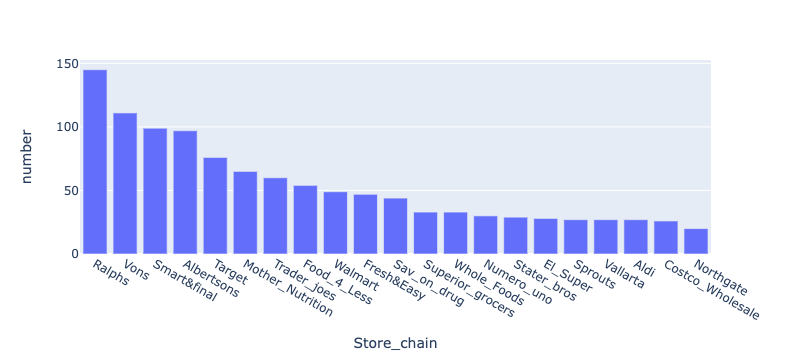

In [39]:
fig = px.bar(stores_drop,
       x='Store_chain',
       y='number'
)

fig.show()

In [41]:
gdf = gpd.GeoDataFrame(gs_trimmed, 
                       crs='epsg:4326',
                       geometry=gpd.points_from_xy(gs_trimmed.Longitude, gs_trimmed.Latitude))

In [42]:
gdf.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [43]:
gdf_web_mercator = gdf.to_crs(epsg=3857)

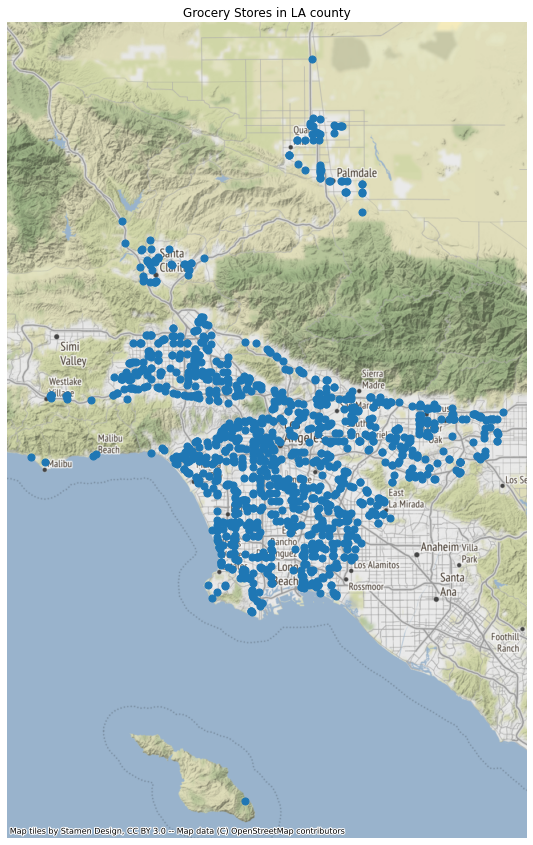

In [44]:
fig, ax = plt.subplots(figsize=(20,15))

gdf_web_mercator.plot(ax=ax, 
                      marker='o',
                      markersize=50
                )

ax.axis('off')

ax.set_title('Grocery Stores in LA county')

ctx.add_basemap(ax)

In [103]:
indexNames = gs_trimmed[(gs_trimmed['Store_Chain'] == 'Haggen') & 
                     (gs_trimmed['Store_Chain'] == '99 Ranch Market')].index


In [94]:
gs_trimmed.drop(indexNames , inplace=True)

In [95]:
gs_trimmed.info

<bound method DataFrame.info of                     Store_Name      Store_Chain Street_Number  \
0           99 Ranch Market 38  99 Ranch Market           345   
1           99 RANCH MARKET 17  99 Ranch Market         17713   
2           99 Ranch Market 18  99 Ranch Market          1625   
3            99 RANCH MARKET 7  99 Ranch Market          1300   
4            99 Ranch Market 3  99 Ranch Market          1015   
...                        ...              ...           ...   
1372  Whole Foods Market 10177      Whole_Foods          6350   
1373  Whole Foods Market 10536      Whole_Foods         12746   
1374  Whole Foods Market 10545      Whole_Foods          3401   
1375  Whole Foods Market 10383      Whole_Foods           500   
1376  Whole Foods Market 10173      Whole_Foods          2201   

            Street_Name Additional Address              City Zip_Code  \
0             E Main St                             Alhambra    91801   
1          Pioneer Blvd                  

In [98]:
gs_mini = gs_trimmed[['Store_Name','Store_Chain','Latitude','Longitude']].copy()
gs_mini.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1377 entries, 0 to 1376
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Store_Name   1377 non-null   object
 1   Store_Chain  1377 non-null   object
 2   Latitude     1377 non-null   object
 3   Longitude    1377 non-null   object
dtypes: object(4)
memory usage: 86.1+ KB


In [99]:
gs_mini.sample(5)

,Store_Name,Store_Chain,Latitude,Longitude
432,JONS MARKET 7,Jons,34.09083,-118.3048
339,GALLERIA MARKET,Galleria,34.05263,-118.3077
1330,Walmart Store 2526,Walmart,34.27505,-118.5664
672,RALPHS GROCERY CO. 213,Ralphs,34.18647,-118.6263
977,Superior Grocers 113,Superior_grocers,34.04049,-118.1863


In [100]:
gs_mini['Latitude'] = gs_mini['Latitude'].astype(float)
gs_mini['Longitude'] = gs_mini['Longitude'].astype(float)
gs_mini.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1377 entries, 0 to 1376
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Store_Name   1377 non-null   object 
 1   Store_Chain  1377 non-null   object 
 2   Latitude     1377 non-null   float64
 3   Longitude    1377 non-null   float64
dtypes: float64(2), object(2)
memory usage: 86.1+ KB


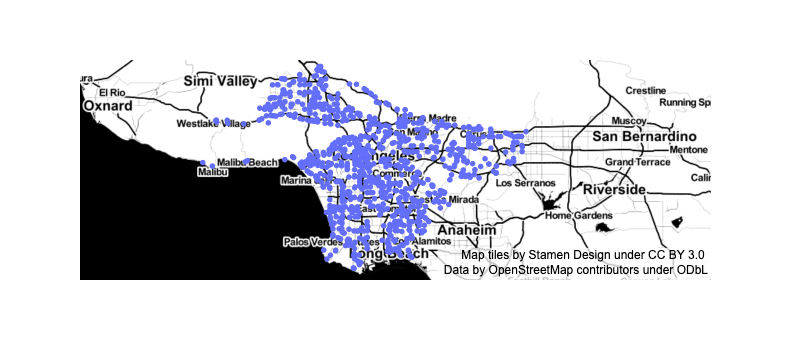

In [101]:
fig = px.scatter_mapbox(gs_mini,
                        lat='Latitude',
                        lon='Longitude',
                        mapbox_style="stamen-toner")
fig.show()

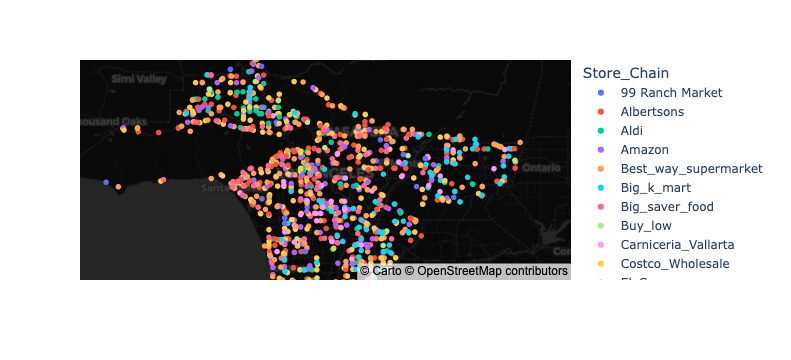

In [102]:
fig = px.scatter_mapbox(gs_mini, 
                        lat="Latitude", 
                        lon="Longitude", 
                        color="Store_Chain",
                        labels={'Store_chain':'Store_chain'}
                       )

fig.update_layout(mapbox_style="carto-darkmatter")

fig.show()